## Exercise 2

Based on the **adult dataset**, build a neural network classifier for the target variable `income`. 

In [34]:
#%pip install tensorflow


In [35]:
#%numpy<2

In [36]:
#%pip install pandas

In [37]:
#%pip install scikit-learn

In [ ]:
#%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.8/7.8 MB 31.3 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 20.9 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 27.7 MB/s eta 0:00:00
     -------------------------------------- 211.8/211.8 KB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 KB 1.4 MB/s eta 0:00:00
     -------------------------------------- 107.7/107.7 KB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [ ]:
#%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 294.9/294.9 KB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [39]:
import pandas as pd
import numpy as np
print(pd.__version__)
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

2.2.3


In [40]:
df_adult = pd.read_csv('adult.csv')
df_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [41]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [42]:
features = ["age", "sex", "hours-per-week", "education-num"]
target = "income"

In [43]:
df = df_adult[features + [target]].copy()

In [44]:
df['income'] = df['income'].str.strip().str.rstrip('.')

In [45]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [46]:
df[target] = df[target].apply(lambda x: 1 if x.strip() == ">50K" else 0)

In [47]:
df.head()

,age,sex,hours-per-week,education-num,income
0,39,Male,40,13,0
1,50,Male,13,13,0
2,38,Male,40,9,0
3,53,Male,40,7,0
4,28,Female,40,13,0


In [48]:
df.describe()

,age,hours-per-week,education-num,income
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,40.422382,10.078089,0.239282
std,13.710510,12.391444,2.570973,0.426649
min,17.000000,1.000000,1.000000,0.000000
25%,28.000000,40.000000,9.000000,0.000000
50%,37.000000,40.000000,10.000000,0.000000
75%,48.000000,45.000000,12.000000,0.000000
max,90.000000,99.000000,16.000000,1.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   sex             48842 non-null  object
 2   hours-per-week  48842 non-null  int64 
 3   education-num   48842 non-null  int64 
 4   income          48842 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.9+ MB


Change categorical data-> sex into dummy

In [50]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
print(df.head())


   age  hours-per-week  education-num  income  sex_Male
0   39              40             13       0      True
1   50              13             13       0      True
2   38              40              9       0      True
3   53              40              7       0      True
4   28              40             13       0     False


In [51]:
X = df.drop(columns=['income'])
y = df['income']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled X_train shape:", X_train_scaled.shape)


Scaled X_train shape: (39073, 4)


In [54]:
X_train_np = np.array(X_train_scaled)
X_test_np = np.array(X_test_scaled)
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

print("Type of X_train_np:", type(X_train_np))

Type of X_train_np: <class 'numpy.ndarray'>


In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (X_train_np.shape[1],)  # For tabular data, number of features

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ]
)

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [57]:
# Train the model for 50 epochs with a validation split of 20%
history = model.fit(
    X_train_np, y_train_np,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7792 - loss: 0.4918 - val_accuracy: 0.8042 - val_loss: 0.4143
Epoch 2/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8094 - loss: 0.4085 - val_accuracy: 0.8070 - val_loss: 0.4112
Epoch 3/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8120 - loss: 0.4068 - val_accuracy: 0.8092 - val_loss: 0.4105
Epoch 4/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8075 - loss: 0.4086 - val_accuracy: 0.8075 - val_loss: 0.4098
Epoch 5/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8103 - loss: 0.4052 - val_accuracy: 0.8069 - val_loss: 0.4096
Epoch 6/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8112 - loss: 0.4027 - val_accuracy: 0.8064 - val_loss: 0.4078
Epoch 7/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8134 - loss: 0.4000 - val_accuracy: 0.8077 - val_loss: 0.4073
Epoch 8/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8136 - loss: 0.3983 - val_accuracy: 0.

In [59]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test_np, y_test_np, verbose=0)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.8068379759788513


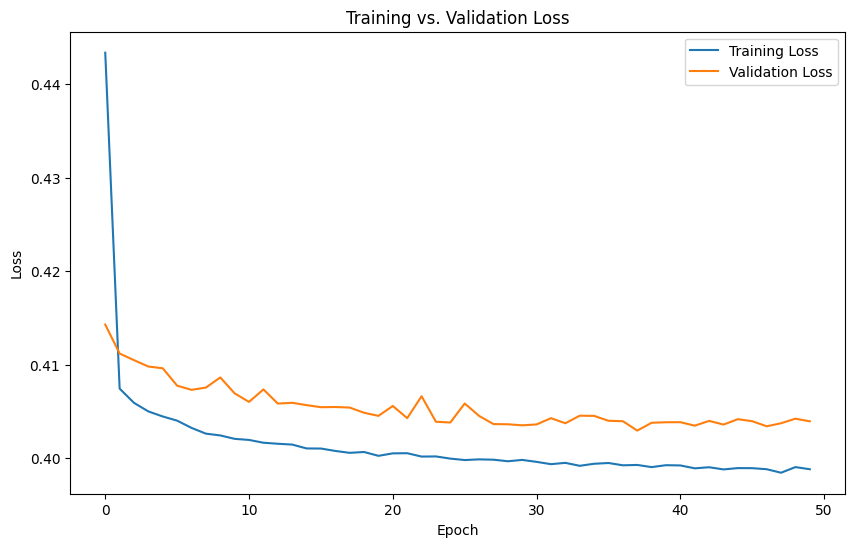

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.show()

In [64]:
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ]
)

model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
history2 = model2.fit(
    X_train_np, y_train_np,
    epochs=25,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/25
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7848 - loss: 0.4548 - val_accuracy: 0.8046 - val_loss: 0.4144
Epoch 2/25
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8072 - loss: 0.4098 - val_accuracy: 0.8014 - val_loss: 0.4134
Epoch 3/25
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8129 - loss: 0.4015 - val_accuracy: 0.8052 - val_loss: 0.4102
Epoch 4/25
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8102 - loss: 0.4031 - val_accuracy: 0.8051 - val_loss: 0.4091
Epoch 5/25
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8128 - loss: 0.4009 - val_accuracy: 0.8060 - val_loss: 0.4081
Epoch 6/25
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8112 - loss: 0.4014 - val_accuracy: 0.8060 - val_loss: 0.4074
Epoch 7/25
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8108 - loss: 0.4030 - val_accuracy: 0.8073 - val_loss: 0.4068
Epoch 8/25
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8120 - loss: 0.4028 - val_accuracy: 0.

In [67]:
test_loss2, test_accuracy2 = model2.evaluate(X_test_np, y_test_np, verbose=0)
print("Test Accuracy after 25 epochs:", test_accuracy2)

Test Accuracy after 25 epochs: 0.8052000999450684


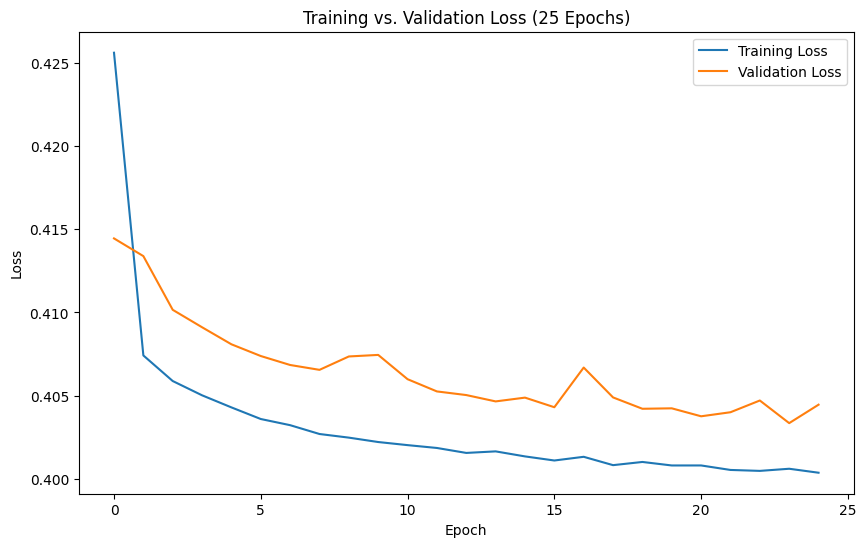

In [68]:
plt.figure(figsize=(10,6))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss (25 Epochs)")
plt.legend()
plt.show()

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step
Precision: 0.6505791505791506
Recall: 0.42929936305732486
F1 Score: 0.5172678434382195


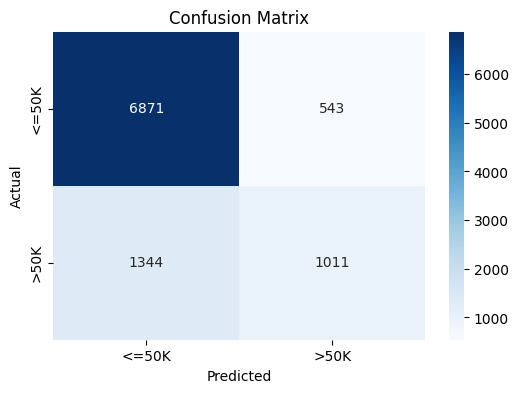

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Predict on the test set and convert probabilities to binary predictions
y_pred_prob = model.predict(X_test_np)
y_pred = (y_pred_prob >= 0.5).astype(int).reshape(-1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_np, y_pred)
recall = recall_score(y_test_np, y_pred)
f1 = f1_score(y_test_np, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Compute confusion matrix
cm = confusion_matrix(y_test_np, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step
Precision: 0.6437659033078881
Recall: 0.429723991507431
F1 Score: 0.5154061624649859


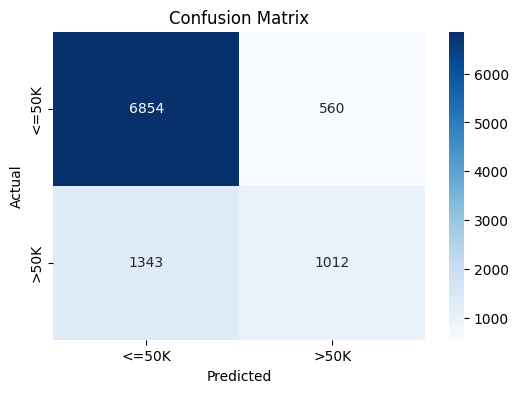

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Predict on the test set and convert probabilities to binary predictions
y_pred_prob = model2.predict(X_test_np)
y_pred = (y_pred_prob >= 0.5).astype(int).reshape(-1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_np, y_pred)
recall = recall_score(y_test_np, y_pred)
f1 = f1_score(y_test_np, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Compute confusion matrix
cm = confusion_matrix(y_test_np, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
